Think Stats book - Chapter 7: Hypothesis Testing

Hypothesis Testing: The underlying logic is similar to a proof by contradiction. For example, to test a hypothesis like, "This effect is real", we assume, temporarily, that it's not and that's the Null Hypothesis. Then we compute the probability of the apparent effect, and that's the p-value. Finally, in order to verify whether the null hypothesis is true, we analyze the p-value, and if it's too low we can conclude that the null hypothesis is unlikely to be true.

Null Hypothesis: A model of the sistem based on the assumption that the apparent effect was actually due to chance.

p-value: The probability of the apparent effect under the null hypothesis

Interpretation: Based on the p-value, we conclude that the effect is either statistically significant, or not

In [48]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chisquare

warnings.filterwarnings('ignore')


np.random.seed(42)

In [3]:
data = pd.read_fwf("2002FemPreg.dat", names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb", "birthwgt_oz",
                                             "prglength", "outcome", "birthord", "agepreg", "finalwgt"],
                                     colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                            (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])
data.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,39,1,1.0,33.0,6448.271112
1,1,1.0,2.0,7.0,14.0,39,1,2.0,39.0,6448.271112
2,2,3.0,1.0,9.0,2.0,39,1,1.0,14.0,12999.542264
3,2,1.0,2.0,7.0,0.0,39,1,2.0,17.0,12999.542264
4,2,1.0,2.0,6.0,3.0,39,1,3.0,18.0,12999.542264


In [4]:
data.shape

(13593, 10)

In [5]:
data.dtypes

caseid           int64
nbrnaliv       float64
babysex        float64
birthwgt_lb    float64
birthwgt_oz    float64
prglength        int64
outcome          int64
birthord       float64
agepreg        float64
finalwgt       float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13593 entries, 0 to 13592
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   caseid       13593 non-null  int64  
 1   nbrnaliv     9148 non-null   float64
 2   babysex      9144 non-null   float64
 3   birthwgt_lb  9144 non-null   float64
 4   birthwgt_oz  9087 non-null   float64
 5   prglength    13593 non-null  int64  
 6   outcome      13593 non-null  int64  
 7   birthord     9148 non-null   float64
 8   agepreg      13241 non-null  float64
 9   finalwgt     13593 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.0 MB


Example 7-1. In the NSFG dataset, the difference in mean weight for first babies is 2.0 ounces. Compute the p-value of this difference. Hint: For this kind of resampling, it's important to sample with replacement.

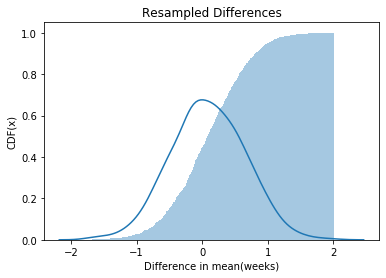

0.001


In [34]:
def compute_difference(data1, data2, replace):
    sample1 = np.random.choice(data1, size=data1.shape[0], replace=replace)
    sample2 = np.random.choice(data2, size=data2.shape[0], replace=replace)
    
    return np.mean(sample1) - np.mean(sample2)


live_births = data[data['outcome'] == 1] 
live_births['birthwgt'] = ((16 * live_births['birthwgt_lb']) + live_births['birthwgt_oz'])
pooled = live_births['birthwgt'].dropna()
first_babies = live_births[live_births['birthord'] == 1]['birthwgt'].dropna()
others = live_births[live_births['birthord'] != 1]['birthwgt'].dropna()

pooled_mean = np.mean(pooled)
pooled_std = np.std(pooled)
first_babies_len = first_babies.shape[0]
others_len = others.shape[0]

first_babies_sample = np.random.normal(pooled_mean, pooled_std, first_babies_len)
others_sample = np.random.normal(pooled_mean, pooled_std, others_len)

differences = np.array([compute_difference(first_babies_sample, others_sample, True) for x in range(1000)])

sns.distplot(differences, label="CDF of Differences in Mean", bins=1000, norm_hist=True, hist_kws={'cumulative': True})
plt.xlabel('Difference in mean(weeks)')
plt.ylabel('CDF(x)')
plt.title('Resampled Differences')
plt.show()

#The p-value is the fraction of differences sample where the value is greater than or equal to delta
delta = 2.0 #since the exercise told us
p_value = (np.where(differences >= delta)[0].shape[0]) / differences.shape[0]
print(p_value)

A false positive is when we accept a hypothesis that is actually false (we consider effect significant when it was actually due to chance). A false negative is when we reject a hypothesis that is actually true (we attribute an effect to chance when it was actually real).

The most common approach to hypothesis testing is to choose a threshold (alfa) for the p-value and to accept as significant any effect with a p-value less than alfa. A common choice for alfa is 5%. Alfa is the false positive, so if you want to decrease the chance of a false positive just decrease the threshold. If the threshold is 3%, then the chance of a false positive is 3%. On the other hand, by decreasing the threshold the chance of rejecting a valid hypothesis is increased.

There are several ways to interpret the result of a hypothesis test: Classical(if a p-value if less than alfa, you can say that the effect is statistically significant, but you cannot conclude that it's real), Practical(the lower the p-value, the higher their confidence in this conclusion), Bayesian(considering posterior distributions).

Cross-validation uses one dataset to formulate the hypothesis and another to test it. One is called training set and the other is the test set.

A chi-square goodness of fit test determines if a sample data matches a population. A chi-square test for independence compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.

In [49]:
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)

In [50]:
chisquare([16, 18, 16, 14, 12, 12])

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)